# Visualizing Networks

In [7]:
#%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
import pickle

# read in the graph 
G = pickle.load(open('major_us_cities', 'rb'))

In [8]:
print(G.nodes(data="location"))

[('El Paso, TX', (-106, 31)), ('Long Beach, CA', (-118, 33)), ('Dallas, TX', (-96, 32)), ('Oakland, CA', (-122, 37)), ('Albuquerque, NM', (-106, 35)), ('Baltimore, MD', (-76, 39)), ('Raleigh, NC', (-78, 35)), ('Mesa, AZ', (-111, 33)), ('Arlington, TX', (-97, 32)), ('Sacramento, CA', (-121, 38)), ('Wichita, KS', (-97, 37)), ('Tucson, AZ', (-110, 32)), ('Cleveland, OH', (-81, 41)), ('Louisville/Jefferson County, KY', (-85, 38)), ('San Jose, CA', (-121, 37)), ('Oklahoma City, OK', (-97, 35)), ('Atlanta, GA', (-84, 33)), ('New Orleans, LA', (-90, 29)), ('Miami, FL', (-80, 25)), ('Fresno, CA', (-119, 36)), ('Philadelphia, PA', (-75, 39)), ('Houston, TX', (-95, 29)), ('Boston, MA', (-71, 42)), ('Kansas City, MO', (-94, 39)), ('San Diego, CA', (-117, 32)), ('Chicago, IL', (-87, 41)), ('Charlotte, NC', (-80, 35)), ('Washington D.C.', (-77, 38)), ('San Antonio, TX', (-98, 29)), ('Phoenix, AZ', (-112, 33)), ('San Francisco, CA', (-122, 37)), ('Memphis, TN', (-90, 35)), ('Los Angeles, CA', (-118,

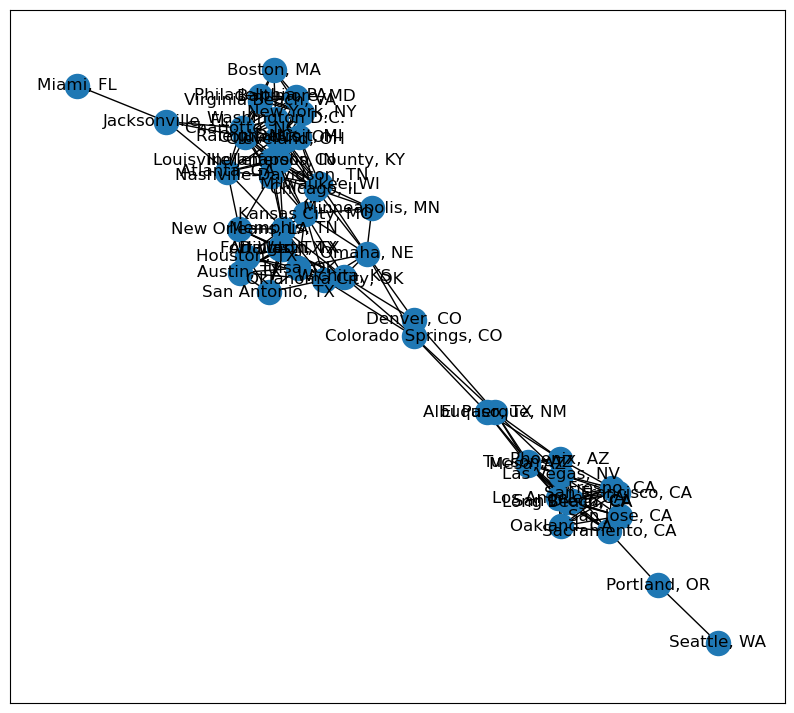

In [9]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [10]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

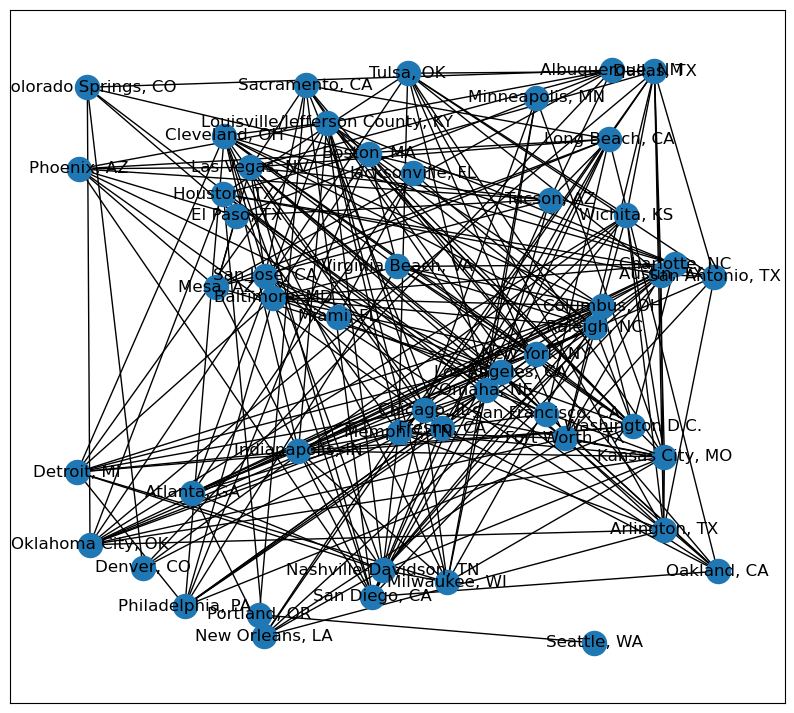

In [11]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

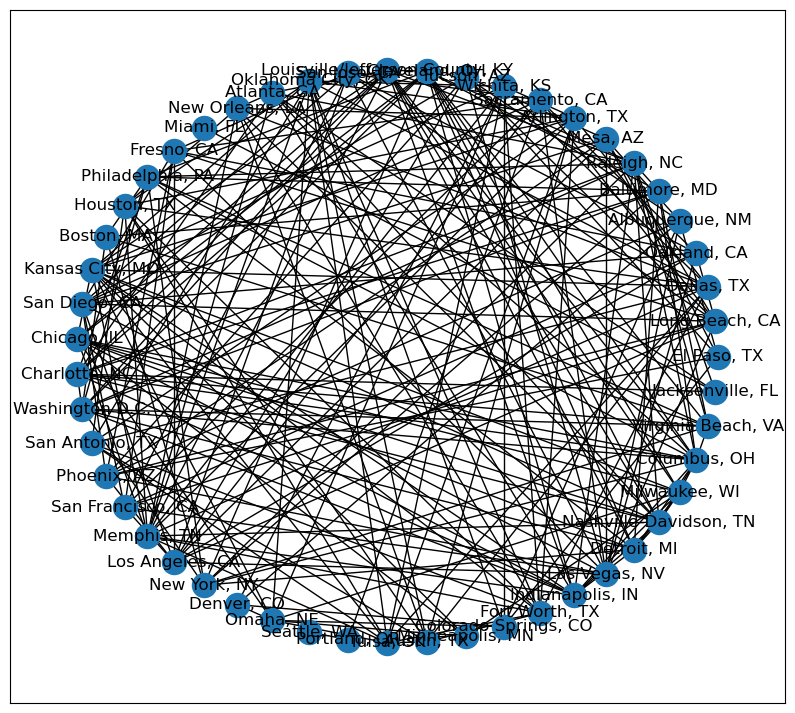

In [12]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

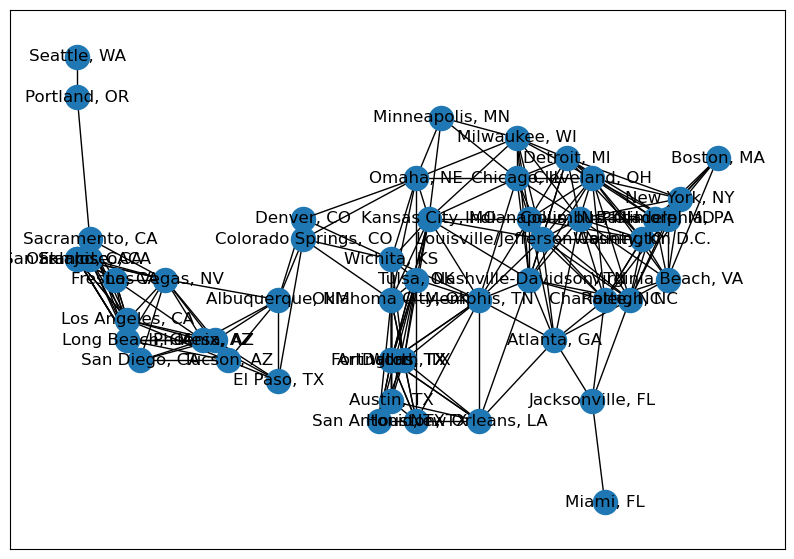

In [13]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

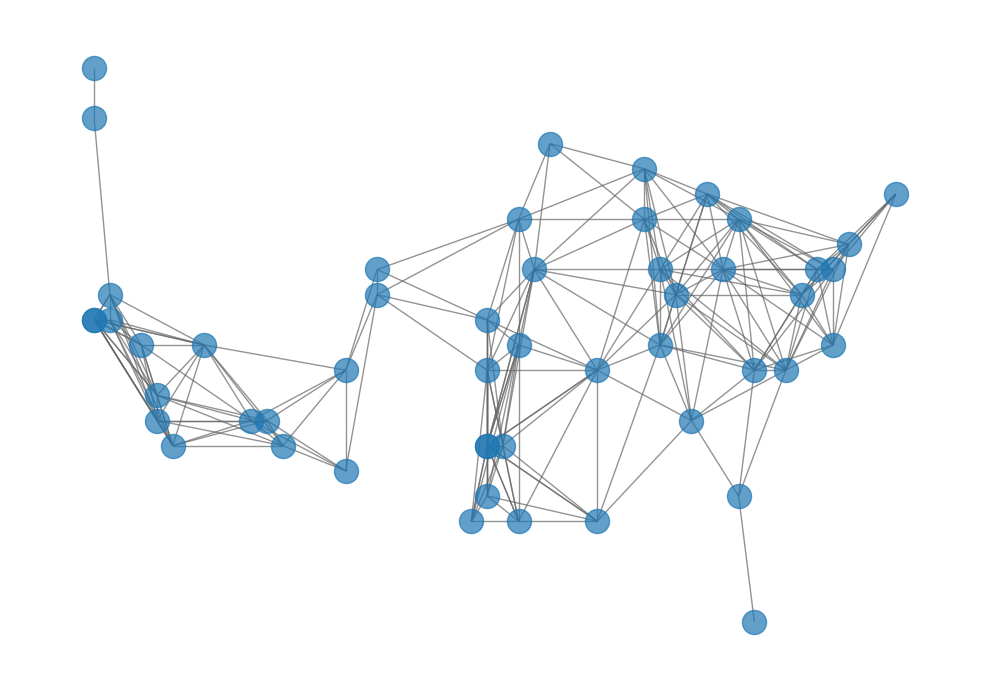

In [23]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='0.4')

plt.axis('off')
plt.tight_layout();

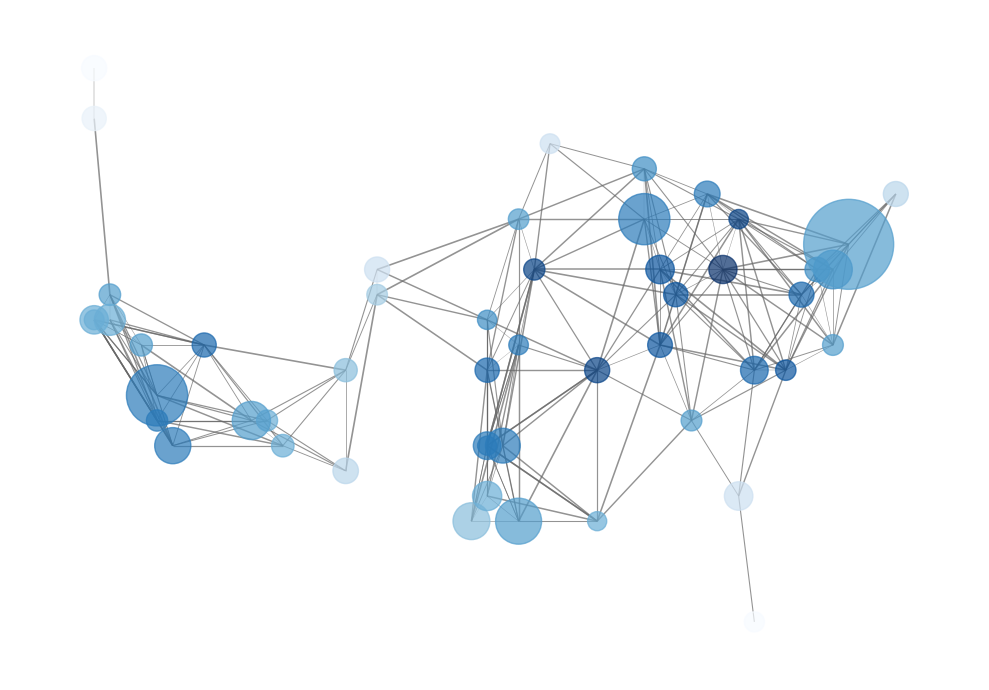

In [28]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

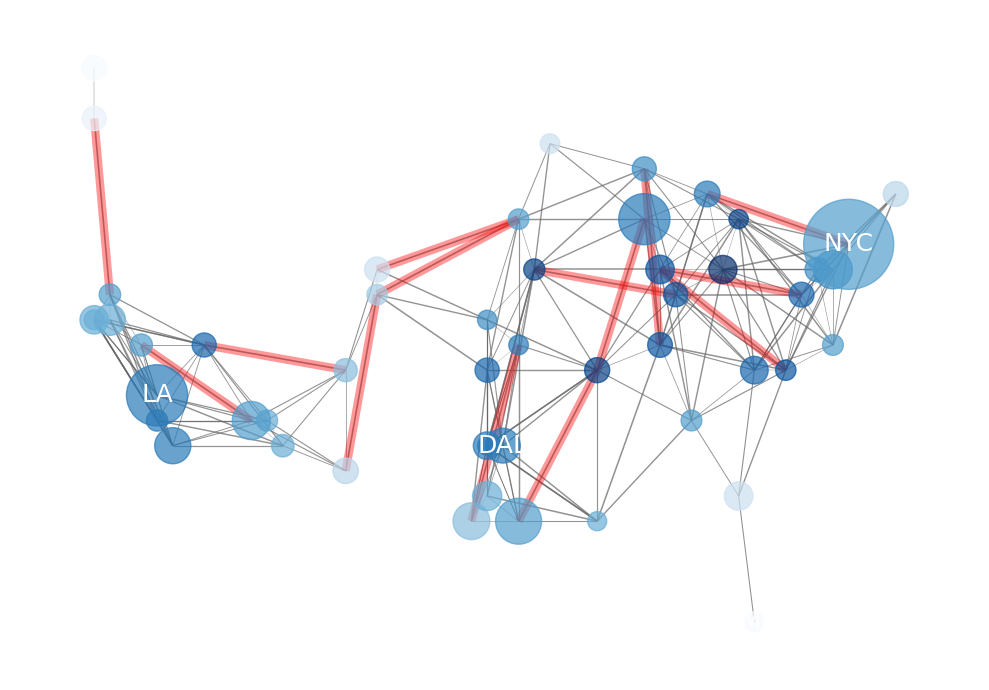

In [32]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC','Dallas, TX': 'DAL', 'Miami, FL': 'MI' }, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();